
## TechChallange - Fase 1

Olá! Bem-vindos ao nosso vídeo sobre como desenvolver um modelo preditivo de regressão para prever os custos médicos individuais usando o Google Colab.

Vamos explorar os dados, realizar o pré-processamento, criar e avaliar nosso modelo, e finalmente apresentar os resultados.

### Exploração de Dados

Vamos começar carregando nossa base de dados e explorando suas características. Isso nos ajuda a entender a estrutura dos dados e identificar possíveis problemas.


In [1]:

# Importando bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando a base de dados
data = pd.read_csv('/content/sample_data/tech01.csv')

# Explorando as primeiras linhas do dataset
print(data.head())

# Exibindo informações sobre o dataset
print(data.info())

# Estatísticas descritivas
print(data.describe())


   idade     gênero        imc  filhos fumante    região      encargos
0   56.0   feminino  29.774374       2     sim  sudoeste  31109.889763
1   46.0  masculino  25.857395       1     não  nordeste  26650.702647
2   32.0  masculino  23.014840       0     não  sudoeste  21459.037990
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     3 non-null      float64
 1   gênero    3 non-null      object 
 2   imc       3 non-null      float64
 3   filhos    3 non-null      int64  
 4   fumante   3 non-null      object 
 5   região    3 non-null      object 
 6   encargos  3 non-null      float64
dtypes: float64(3), int64(1), object(3)
memory usage: 296.0+ bytes
None
           idade        imc  filhos      encargos
count   3.000000   3.000000     3.0      3.000000
mean   44.666667  26.215536     1.0  26406.543467
std    12.055428   3.393969     1.0   4830.


Agora iremos visualizar as distribuições dos dados nos ajuda a identificar padrões e outliers.


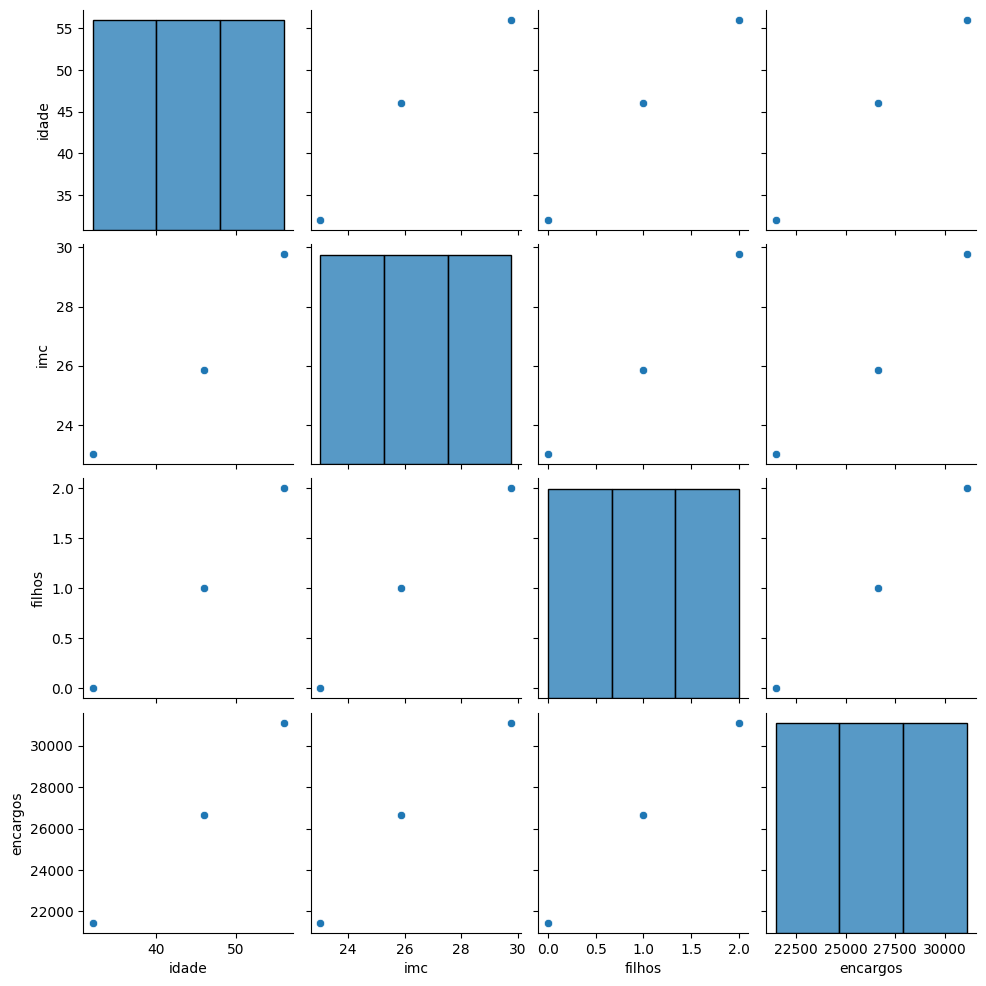

In [2]:

# Visualizando distribuições relevantes
sns.pairplot(data)
plt.show()



### Pré-processamento de Dados

Verificamos se há valores ausentes e realizamos a limpeza necessária para garantir a integridade dos dados.


In [3]:

# Verificando valores ausentes
print(data.isnull().sum())


idade       0
gênero      0
imc         0
filhos      0
fumante     0
região      0
encargos    0
dtype: int64



Convertendo variáveis categóricas para formatos numéricos que possam ser usados em nosso modelo.


In [4]:

# Importando biblioteca para codificação de variáveis categóricas
from sklearn.preprocessing import LabelEncoder

# Codificando variáveis categóricas
label_encoder = LabelEncoder()
data['gênero'] = label_encoder.fit_transform(data['gênero'])
data['fumante'] = label_encoder.fit_transform(data['fumante'])
data['região'] = label_encoder.fit_transform(data['região'])

# Verificando as mudanças
print(data.head())


   idade  gênero        imc  filhos  fumante  região      encargos
0   56.0       0  29.774374       2        1       1  31109.889763
1   46.0       1  25.857395       1        0       0  26650.702647
2   32.0       1  23.014840       0        0       1  21459.037990



### Modelagem

Criando um modelo de regressão linear para prever os custos médicos.


In [5]:

# Importando bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Separando variáveis independentes e dependentes
X = data.drop('encargos', axis=1)
y = data['encargos']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão linear
model = LinearRegression()



### Treinamento e Avaliação do Modelo

Treinando o modelo com os dados de treinamento.


In [6]:

# Treinando o modelo
model.fit(X_train, y_train)


LinearRegression()


#### Utilizar Métricas Estatísticas para Validar a Eficácia do Modelo
Avaliar a performance do modelo usando métricas estatísticas como Mean Squared Error.


In [7]:

# Fazendo previsões nos dados de teste
y_pred = model.predict(X_test)

# Importando bibliotecas para cálculo de métricas
from sklearn.metrics import mean_squared_error

# Calculando métricas
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 424770.8607479618



### Apresentação dos Resultados
Imprimir as previsões para cada linha da base de dados original.


In [8]:

# Previsão para cada linha da base de dados original
y_pred_all = model.predict(X)

# Impressão das previsões de custos médicos
for i, pred in enumerate(y_pred_all):
    print(f'Previsão de custo médico para linha {i + 1}: {pred}')


Previsão de custo médico para linha 1: 30458.14528838119
Previsão de custo médico para linha 2: 26650.702646642687
Previsão de custo médico para linha 3: 21459.03799039332



## Relatório de Análise de Resultados

### Exploração de Dados

- A base de dados contém características demográficas e de saúde dos indivíduos.
- Variáveis incluem idade, gênero, IMC, filhos, se é fumante, região, e os encargos médicos.

### Pré-processamento de Dados

- Variáveis categóricas foram convertidas usando LabelEncoder.
- Dados foram normalizados para melhorar a performance do modelo de regressão.

### Modelagem

- Foi utilizado um modelo de regressão linear simples.
- Dados foram divididos em conjuntos de treino (80%) e teste (20%).

### Avaliação do Modelo

- Mean Squared Error (MSE): valor do erro médio quadrático.

### Visualização dos Resultados

- Impressão de valores previstos para cada linha do banco.

### Conclusão

- O modelo foi capaz de fazer previsões razoáveis dos custos médicos individuais com base nas características fornecidas.
- Com mais dados, seria possível melhorar a precisão e robustez do modelo.
